In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.pandas.set_option('display.max_columns',None)

In [2]:
train_data = pd.read_excel("../data/bank_telemaketing.xlsx")
print(train_data.shape)

(41188, 21)


In [3]:
train_data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
train_data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [5]:
# 1) By Looking at this Data there is lot of Skwness in some data
# 2) there are no Zero Variance in Numerical Data

In [6]:
# Checking the Missing Values
features_with_na=[features for features in train_data.columns if train_data[features].isnull().sum()>=1]
for feature in features_with_na:
    print(feature, np.round(train_data[feature].isnull().mean()*100, 2),  ' % missing values')

In [7]:
# 3) There are no Missing Values

In [8]:
numerical_features = [feature for feature in train_data.columns if train_data[feature].dtypes != 'O']
non_numerical_feature = [feature for feature in train_data.columns if train_data[feature].dtypes == 'O']

In [9]:
numerical_features

['age',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed']

In [10]:
non_numerical_feature

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome',
 'y']

In [11]:
# In Numeric Data Try to find the Discrete data and Continuous Data

In [12]:
# to find the Discrete Data in the Numeric data
for feature in numerical_features:
    if feature != "Churn": # Churn is the Target Column
        print(f'{feature} => {len(train_data[feature].unique())}')

age => 78
duration => 1544
campaign => 42
pdays => 27
previous => 8
emp.var.rate => 10
cons.price.idx => 26
cons.conf.idx => 26
euribor3m => 316
nr.employed => 11


In [13]:
# 4) By Looking at this data previous, nr.employes, emp.var.rate, are Discrete Numeric Data

In [14]:
discrete_numerical_feature=[feature for feature in numerical_features if len(train_data[feature].unique())<25 and feature]
print("Discrete Numerical Variable Count : {}".format(len(discrete_numerical_feature)))

Discrete Numerical Variable Count : 3


<AxesSubplot:ylabel='y'>

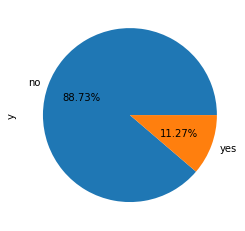

In [15]:
train_data['y'].value_counts().plot.pie(autopct = '%1.2f%%')

In [16]:
# 5) By Looking at this data, It is not Balanced Data  no >> yes there are chances that we might have to use the upsampeling technique

In [17]:
continuous_numerical_feature=[feature for feature in numerical_features if len(train_data[feature].unique())>25 and feature != "PassengerId"]
print("Continuous Numerical Variable Count : {}".format(len(continuous_numerical_feature)))

Continuous Numerical Variable Count : 7


In [18]:
train_data["y"] = train_data['y'].map({'yes':1, 'no':0})

In [19]:
train_data[continuous_numerical_feature].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   duration        41188 non-null  int64  
 2   campaign        41188 non-null  int64  
 3   pdays           41188 non-null  int64  
 4   cons.price.idx  41188 non-null  float64
 5   cons.conf.idx   41188 non-null  float64
 6   euribor3m       41188 non-null  float64
dtypes: float64(3), int64(4)
memory usage: 2.2 MB


--------------------------------age--------------------------------------------


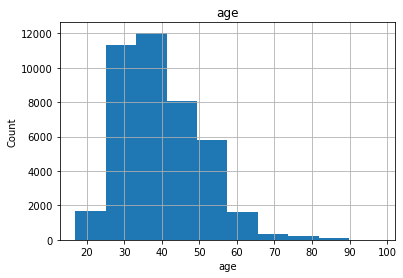

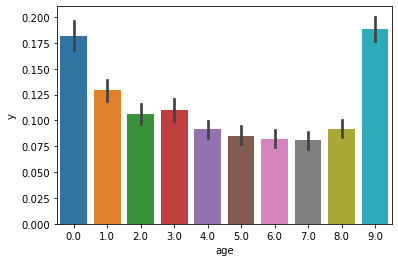

-------------------------------age END--------------------------------------------


--------------------------------duration--------------------------------------------


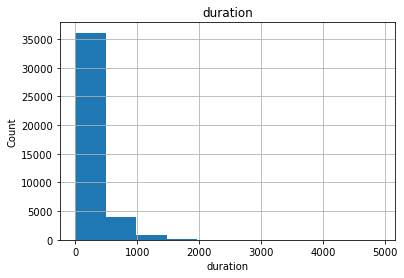

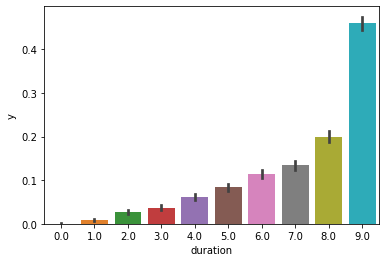

-------------------------------duration END--------------------------------------------


--------------------------------campaign--------------------------------------------


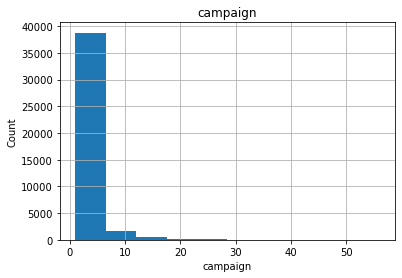

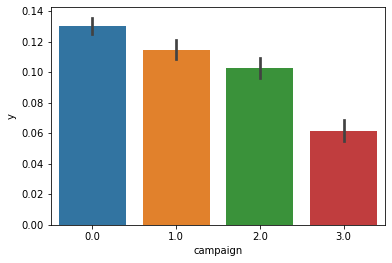

-------------------------------campaign END--------------------------------------------


--------------------------------pdays--------------------------------------------


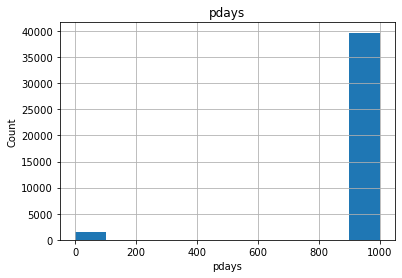

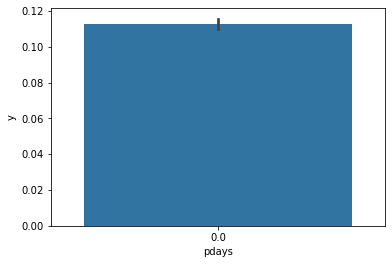

-------------------------------pdays END--------------------------------------------


--------------------------------cons.price.idx--------------------------------------------


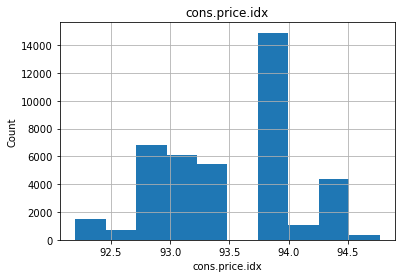

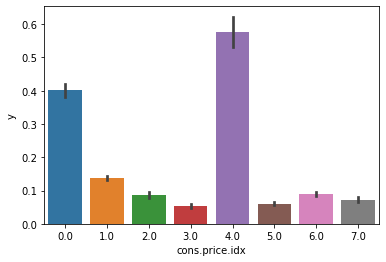

-------------------------------cons.price.idx END--------------------------------------------


--------------------------------cons.conf.idx--------------------------------------------


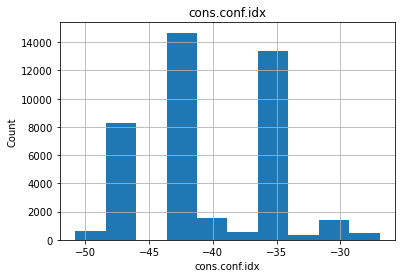

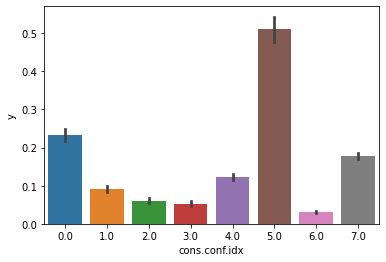

-------------------------------cons.conf.idx END--------------------------------------------


--------------------------------euribor3m--------------------------------------------


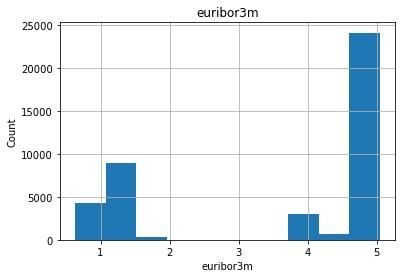

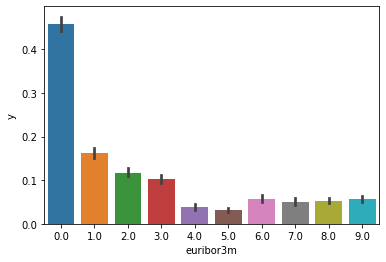

-------------------------------euribor3m END--------------------------------------------




In [20]:
from sklearn.preprocessing import KBinsDiscretizer
from numpy import mean
discrete=KBinsDiscretizer(n_bins=10,encode='ordinal', strategy='quantile')
num_binned=pd.DataFrame(discrete.fit_transform(train_data[continuous_numerical_feature]),index=train_data[continuous_numerical_feature].index, columns=train_data[continuous_numerical_feature].columns)
Y=train_data[['y']]
X_bin_combined=pd.concat([Y,num_binned],axis=1,join='inner')

for feature in continuous_numerical_feature:
    print(f"--------------------------------{feature}--------------------------------------------")
    data=train_data.copy()
    data[feature].hist(bins=10)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()
    sns.barplot(x=feature, y="y",data=X_bin_combined, estimator=mean )
    plt.show()
    print(f"-------------------------------{feature} END--------------------------------------------\n\n")

In [21]:
'''
    6) Age
        -> Its Not Normally Distributed
        -> we are not able to fined relation
    7) duration
        -> Right Skweed
        -> Higher the Duration better chances of Yes
    8) campaign
        -> Right Skweed
        -> Lesser the Campaign Higher the Yes
    9) pdays
        -> not able to read
    10) cons.price.idx
        -> Non Linaar data (RF, Poly SVM, Boosting technique will be better)
    11) cons.conf.idx
        -> Non Linaar data
'''

'\n    6) Age\n        -> Its Not Normally Distributed\n        -> we are not able to fined relation\n    7) duration\n        -> Right Skweed\n        -> Higher the Duration better chances of Yes\n    8) campaign\n        -> Right Skweed\n        -> Lesser the Campaign Higher the Yes\n    9) pdays\n        -> not able to read\n    10) cons.price.idx\n        -> Non Linaar data (RF, Poly SVM, Boosting technique will be better)\n    11) cons.conf.idx\n        -> Non Linaar data\n'

In [30]:
for feature in non_numerical_feature+discrete_numerical_feature+["pdays"]:
    print(f"--------------------------------{feature}--------------------------------------")
#     print(train_data[feature])
    print(train_data[feature].value_counts())
    print(f"--------------------------------------------------------------------------------\n\n")

--------------------------------job--------------------------------------


NameError: name 'sort' is not defined

--------------------------------job--------------------------------------
job
admin.           10422
blue-collar       9254
entrepreneur      1456
housemaid         1060
management        2924
retired           1720
self-employed     1421
services          3969
student            875
technician        6743
unemployed        1014
unknown            330
Name: job, dtype: int64


y                 0     1
job                      
admin.         9070  1352
blue-collar    8616   638
entrepreneur   1332   124
housemaid       954   106
management     2596   328
retired        1286   434
self-employed  1272   149
services       3646   323
student         600   275
technician     6013   730
unemployed      870   144
unknown         293    37


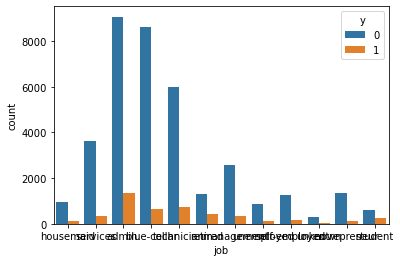

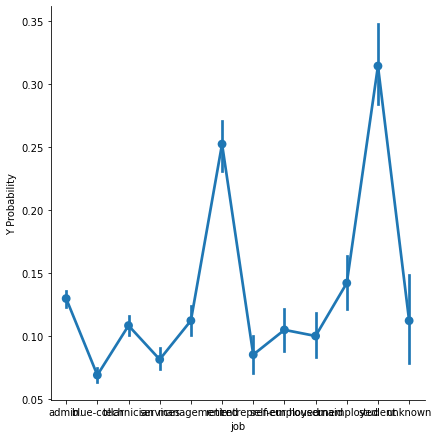

--------------------------------------------------------------------------------


--------------------------------marital--------------------------------------
marital
divorced     4612
married     24928
single      11568
unknown        80
Name: marital, dtype: int64


y             0     1
marital              
divorced   4136   476
married   22396  2532
single     9948  1620
unknown      68    12


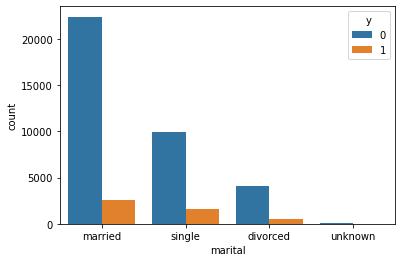

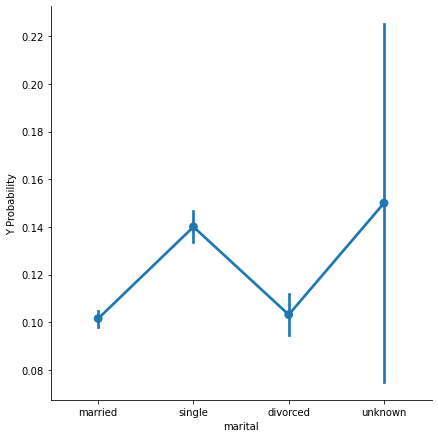

--------------------------------------------------------------------------------


--------------------------------education--------------------------------------
education
basic.4y                4176
basic.6y                2292
basic.9y                6045
high.school             9515
illiterate                18
professional.course     5243
university.degree      12168
unknown                 1731
Name: education, dtype: int64


y                        0     1
education                       
basic.4y              3748   428
basic.6y              2104   188
basic.9y              5572   473
high.school           8484  1031
illiterate              14     4
professional.course   4648   595
university.degree    10498  1670
unknown               1480   251


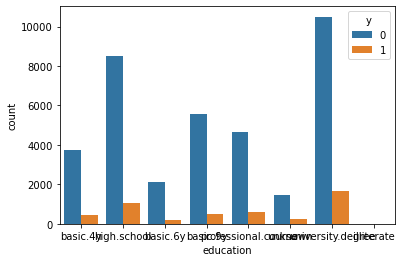

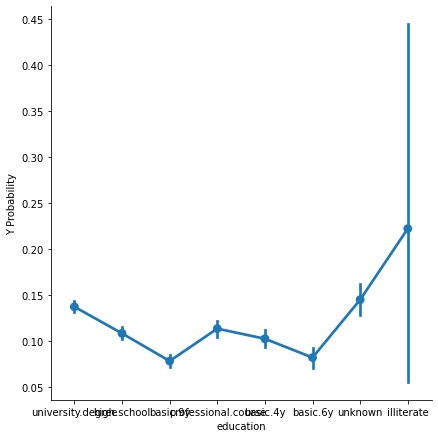

--------------------------------------------------------------------------------


--------------------------------default--------------------------------------
default
no         32588
unknown     8597
yes            3
Name: default, dtype: int64


y            0     1
default             
no       28391  4197
unknown   8154   443
yes          3     0


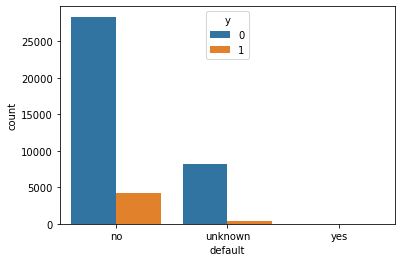

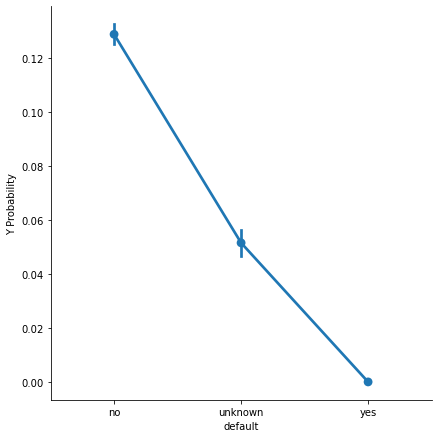

--------------------------------------------------------------------------------


--------------------------------housing--------------------------------------
housing
no         18622
unknown      990
yes        21576
Name: housing, dtype: int64


y            0     1
housing             
no       16596  2026
unknown    883   107
yes      19069  2507


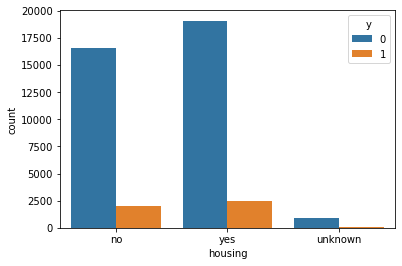

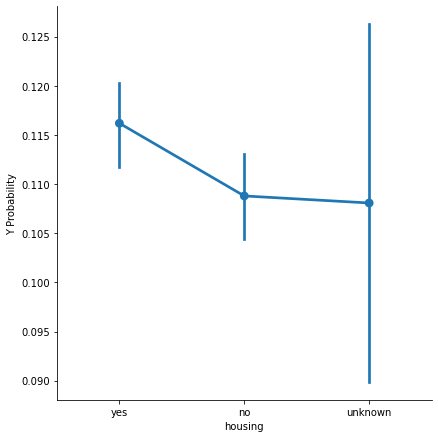

--------------------------------------------------------------------------------


--------------------------------loan--------------------------------------
loan
no         33950
unknown      990
yes         6248
Name: loan, dtype: int64


y            0     1
loan                
no       30100  3850
unknown    883   107
yes       5565   683


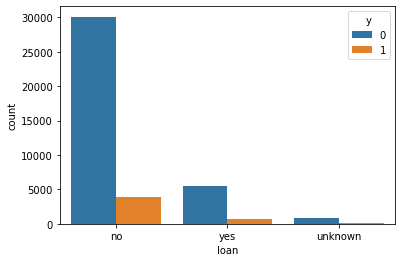

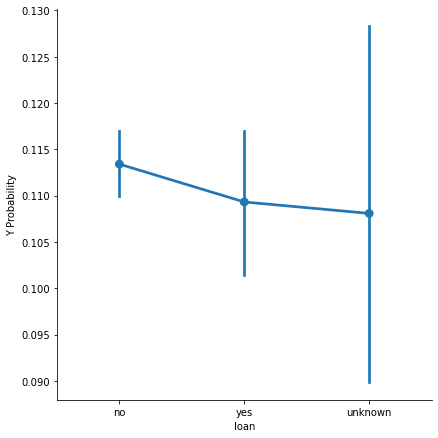

--------------------------------------------------------------------------------


--------------------------------contact--------------------------------------
contact
cellular     26144
telephone    15044
Name: contact, dtype: int64


y              0     1
contact               
cellular   22291  3853
telephone  14257   787


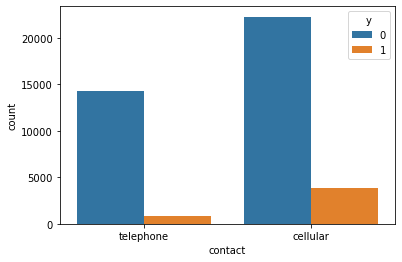

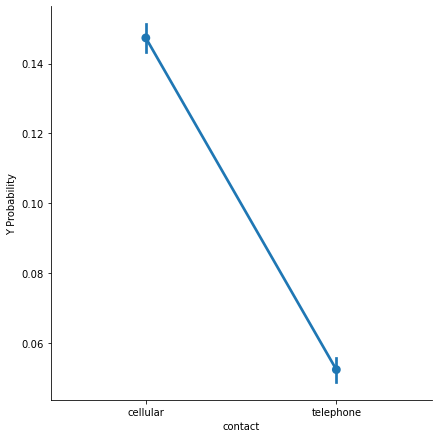

--------------------------------------------------------------------------------


--------------------------------month--------------------------------------
month
apr     2632
aug     6178
dec      182
jul     7174
jun     5318
mar      546
may    13769
nov     4101
oct      718
sep      570
Name: month, dtype: int64


y          0    1
month            
apr     2093  539
aug     5523  655
dec       93   89
jul     6525  649
jun     4759  559
mar      270  276
may    12883  886
nov     3685  416
oct      403  315
sep      314  256


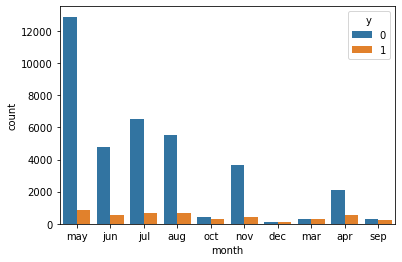

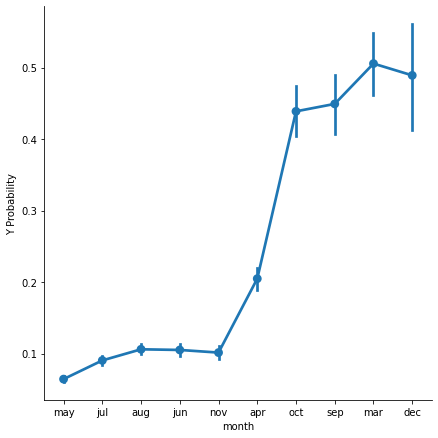

--------------------------------------------------------------------------------


--------------------------------day_of_week--------------------------------------
day_of_week
fri    7827
mon    8514
thu    8623
tue    8090
wed    8134
Name: day_of_week, dtype: int64


y               0     1
day_of_week            
fri          6981   846
mon          7667   847
thu          7578  1045
tue          7137   953
wed          7185   949


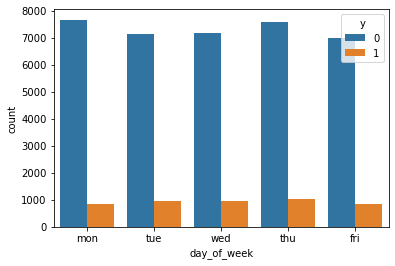

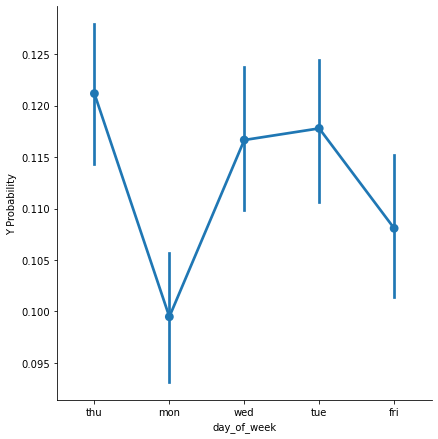

--------------------------------------------------------------------------------


--------------------------------poutcome--------------------------------------
poutcome
failure         4252
nonexistent    35563
success         1373
Name: poutcome, dtype: int64


y                0     1
poutcome                
failure       3647   605
nonexistent  32422  3141
success        479   894


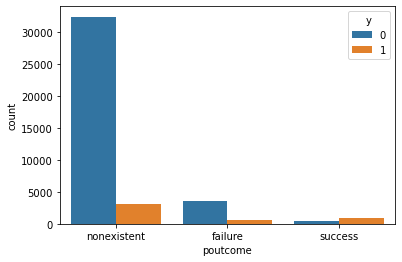

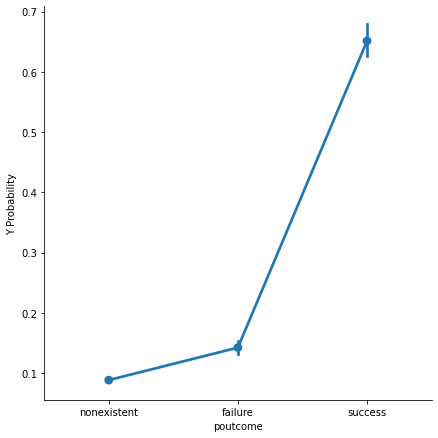

--------------------------------------------------------------------------------


--------------------------------previous--------------------------------------
previous
0    35563
1     4561
2      754
3      216
4       70
5       18
6        5
7        1
Name: previous, dtype: int64


y             0     1
previous             
0         32422  3141
1          3594   967
2           404   350
3            88   128
4            32    38
5             5    13
6             2     3
7             1     0


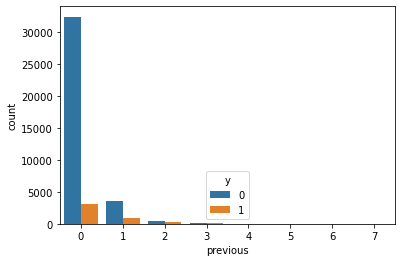

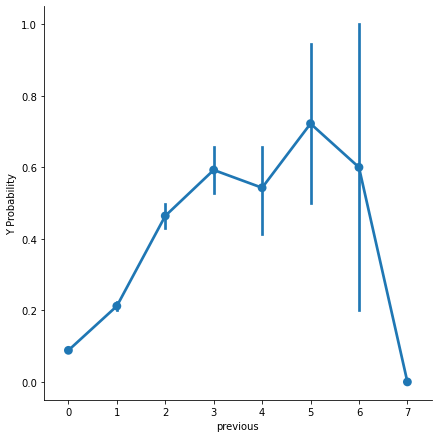

--------------------------------------------------------------------------------


--------------------------------emp.var.rate--------------------------------------
emp.var.rate
-3.4     1071
-3.0      172
-2.9     1663
-1.8     9184
-1.7      773
-1.1      635
-0.2       10
-0.1     3683
 1.1     7763
 1.4    16234
Name: emp.var.rate, dtype: int64


y                 0     1
emp.var.rate             
-3.4            617   454
-3.0             84    88
-2.9           1069   594
-1.8           7723  1461
-1.7            370   403
-1.1            334   301
-0.2              9     1
-0.1           3451   232
 1.1           7523   240
 1.4          15368   866


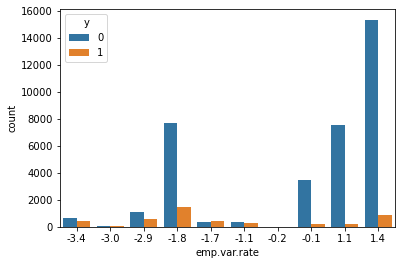

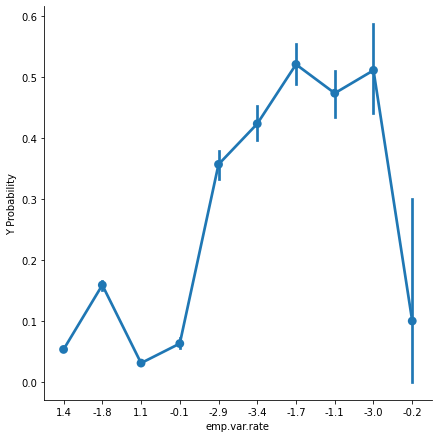

--------------------------------------------------------------------------------


--------------------------------nr.employed--------------------------------------
nr.employed
4963.6      635
4991.6      773
5008.7      650
5017.5     1071
5023.5      172
5076.2     1663
5099.1     8534
5176.3       10
5191.0     7763
5195.8     3683
5228.1    16234
Name: nr.employed, dtype: int64


y                0     1
nr.employed             
4963.6         334   301
4991.6         370   403
5008.7         281   369
5017.5         617   454
5023.5          84    88
5076.2        1069   594
5099.1        7442  1092
5176.3           9     1
5191.0        7523   240
5195.8        3451   232
5228.1       15368   866


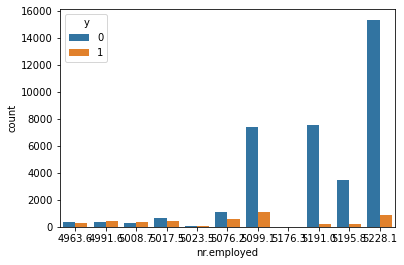

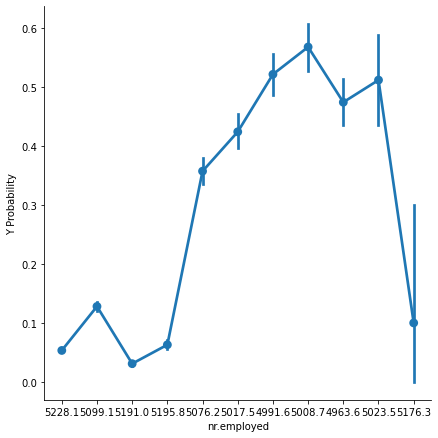

--------------------------------------------------------------------------------


--------------------------------pdays--------------------------------------
pdays
0         15
1         26
2         61
3        439
4        118
5         46
6        412
7         60
8         18
9         64
10        52
11        28
12        58
13        36
14        20
15        24
16        11
17         8
18         7
19         3
20         1
21         2
22         3
25         1
26         1
27         1
999    39673
Name: pdays, dtype: int64


y          0     1
pdays             
0          5    10
1         18     8
2         24    37
3        141   298
4         55    63
5         17    29
6        123   289
7         20    40
8          6    12
9         29    35
10        22    30
11        13    15
12        32    26
13         8    28
14         9    11
15         8    16
16         5     6
17         6     2
18         3     4
19         2     1
20         1     0
21         0     2


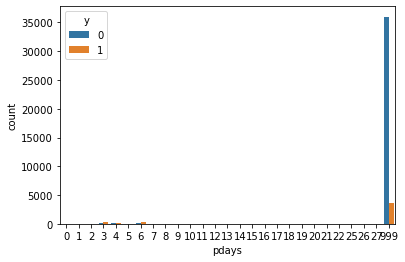

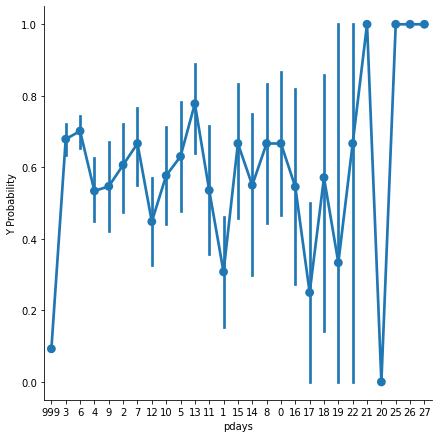

--------------------------------------------------------------------------------




In [27]:
for feature in non_numerical_feature+discrete_numerical_feature+["pdays"]:
    if feature != "customerID" and feature != "y":
        print(f"--------------------------------{feature}--------------------------------------")
        print(train_data.groupby(feature)[feature].count())
        print("\n")
        print(pd.crosstab(train_data[feature], train_data["y"]))
        sns.countplot(feature, data = train_data, hue = 'y')
        plt.show()
        g = sns.factorplot(x=feature, y="y", data=train_data, size=6, order=train_data[feature].value_counts().index)
        g.set_ylabels("Y Probability")
        plt.show()
        print(f"--------------------------------------------------------------------------------\n\n")